# SpaCy

### Basic Features

<img src="spacy_features.png">

In [1]:
import spacy

nlp = spacy.load('en')    # loads the english language package
nlp # the spacy object

In [2]:
doc1 = nlp("My name is Meghana") # the doc object
type(doc1), type(nlp)

(spacy.tokens.doc.Doc, spacy.lang.en.English)

In [3]:
doc_file = nlp(open("example.txt").read())
doc_file

All human beings are born free and equal in dignity and rights. They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood. Everyone has the right to life, liberty and security of person.

## Tokenization


In [4]:
# Sentence Tokens: Splitting the text into sentences

for index, sentence in enumerate(doc_file.sents):
    print(f'{index}: {sentence}')

0: All human beings are born free and equal in dignity and rights.
1: They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood.
2: Everyone has the right to life, liberty and security of person.


In [5]:
# Word Tokens: Splitting the text into words

for word in doc_file:
    print(f'{word.text}')


All
human
beings
are
born
free
and
equal
in
dignity
and
rights
.
They
are
endowed
with
reason
and
conscience
and
should
act
towards
one
another
in
a
spirit
of
brotherhood
.
Everyone
has
the
right
to
life
,
liberty
and
security
of
person
.


In [6]:
# Tokenizing a sentence

doc_file.sents # is a generator and not iterator. so you cannot index/subscript
print(list(doc_file.sents)[0],'\n')

for word in list(doc_file.sents)[0]:
    print(word.text)

All human beings are born free and equal in dignity and rights. 

All
human
beings
are
born
free
and
equal
in
dignity
and
rights
.


In [7]:
print(doc_file.text,'\n')
print(doc_file.text.split(' '),'\n')

All human beings are born free and equal in dignity and rights. They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood. Everyone has the right to life, liberty and security of person. 

['All', 'human', 'beings', 'are', 'born', 'free', 'and', 'equal', 'in', 'dignity', 'and', 'rights.', 'They', 'are', 'endowed', 'with', 'reason', 'and', 'conscience', 'and', 'should', 'act', 'towards', 'one', 'another', 'in', 'a', 'spirit', 'of', 'brotherhood.', 'Everyone', 'has', 'the', 'right', 'to', 'life,', 'liberty', 'and', 'security', 'of', 'person.'] 



## Part Of Speech 

In [8]:
doc_pos = nlp("spaCy excels at large-scale information extraction tasks. It's written from the ground up in carefully memory-managed Cython. Independent research has confirmed that spaCy is the fastest in the world. If your application needs to process entire web dumps, spaCy is the library you want to be using.")

for word in doc_pos:
    print(word.text, word.pos_, word.tag_)

spaCy ADJ JJ
excels NOUN NNS
at ADP IN
large ADJ JJ
- PUNCT HYPH
scale NOUN NN
information NOUN NN
extraction NOUN NN
tasks NOUN NNS
. PUNCT .
It PRON PRP
's VERB VBZ
written VERB VBN
from ADP IN
the DET DT
ground NOUN NN
up PART RP
in ADP IN
carefully ADV RB
memory NOUN NN
- PUNCT HYPH
managed VERB VBN
Cython PROPN NNP
. PUNCT .
Independent ADJ JJ
research NOUN NN
has VERB VBZ
confirmed VERB VBN
that ADP IN
spaCy ADJ JJ
is VERB VBZ
the DET DT
fastest ADJ JJS
in ADP IN
the DET DT
world NOUN NN
. PUNCT .
If ADP IN
your ADJ PRP$
application NOUN NN
needs VERB VBZ
to PART TO
process VERB VB
entire ADJ JJ
web NOUN NN
dumps NOUN NNS
, PUNCT ,
spaCy ADJ JJ
is VERB VBZ
the DET DT
library NOUN NN
you PRON PRP
want VERB VBP
to PART TO
be VERB VB
using VERB VBG
. PUNCT .


In [9]:
spacy.explain('DET') # explains the meaning of POS abbreviation

'determiner'

In [10]:
doc_pos = nlp('I fish a fish')
for word in doc_pos:
    print(word.text, word.pos_, word.tag_)

I PRON PRP
fish VERB VBP
a DET DT
fish NOUN NN


## Dependency Parsing



In [13]:
doc_dp = nlp("spaCy excels at large-scale information extraction tasks. It's written from the ground up in carefully memory-managed Cython. Independent research has confirmed that spaCy is the fastest in the world. If your application needs to process entire web dumps, spaCy is the library you want to be using.")

for terms in doc_dp.noun_chunks:
    print(terms.text)

spaCy excels
large-scale information extraction tasks
It
the ground
carefully memory-managed Cython
Independent research
the world
your application
entire web dumps
the library
you


In [15]:
doc_dp = nlp('Adam likes Eve')
for word in doc_dp:
    print(word.text, word.pos_, word.tag_, word.dep_)

Adam PROPN NNP nsubj
likes VERB VBZ ROOT
Eve PROPN NNP dobj


In [16]:
spacy.explain('nsubj'), spacy.explain('ROOT'), spacy.explain('dobj')

('nominal subject', None, 'direct object')

In [17]:
# Visualizing of the dependecies using displaCy

from spacy import displacy

displacy.render(doc_dp, style='dep', jupyter = True)


In [18]:
options = {'compact': True, 'bg':'lightblue', 'color': '#fff', 'font': 'Sans Serif'}

displacy.render(doc_dp, style='dep',options= options, jupyter = True)

## Lemmatization



In [19]:
doc_ex = nlp('study studying studious studio student is was be were what')
for word in doc_ex:
    print(word.text, word.lemma_, word.pos_)

study study NOUN
studying study VERB
studious studious ADJ
studio studio NOUN
student student NOUN
is be VERB
was be VERB
be be VERB
were be VERB
what what NOUN


## Named Entity Recognistion

In [20]:
doc_ex = nlp("11-11-2018 Apple orange James Matt. BMW 3 thousand dollars. 2020. 34 BC. San Jose, 43 AD")

for word in doc_ex.ents:
    print(word.text, word.label_)

11-11-2018 DATE
Apple ORG
James Matt PERSON
BMW ORG
3 thousand dollars MONEY
2020 DATE
34 CARDINAL
BC ORG
San Jose GPE
43 AD DATE


In [21]:
spacy.explain('CARDINAL'), spacy.explain('GPE')

('Numerals that do not fall under another type', 'Countries, cities, states')

In [22]:
displacy.render(doc_ex, style='ent', jupyter = True)

## Similarity

In [23]:
doc1 = nlp('cat')
doc2 = nlp('dog')

doc1.similarity(doc2)

0.7344888830832419

In [24]:
doc1 = nlp('german shepard')
doc2 = nlp('bulldog')

doc1.similarity(doc2)

0.456086355667371

In [25]:
doc1 = nlp('smart')
doc2 = nlp('clever')

doc1.similarity(doc2)

0.8051829760169926

In [26]:
# Visualizing similarities

ex = nlp('wolf dog cat bird fish')

for token1 in ex:
    for token2 in ex:
        print((token1.text, token2.text),'Similarity => ', token1.similarity(token2))
        

('wolf', 'wolf') Similarity =>  1.0
('wolf', 'dog') Similarity =>  0.5235
('wolf', 'cat') Similarity =>  0.30953434
('wolf', 'bird') Similarity =>  0.5279663
('wolf', 'fish') Similarity =>  0.051317185
('dog', 'wolf') Similarity =>  0.5235
('dog', 'dog') Similarity =>  1.0
('dog', 'cat') Similarity =>  0.6250719
('dog', 'bird') Similarity =>  0.4794658
('dog', 'fish') Similarity =>  0.32915196
('cat', 'wolf') Similarity =>  0.30953434
('cat', 'dog') Similarity =>  0.6250719
('cat', 'cat') Similarity =>  1.0
('cat', 'bird') Similarity =>  0.4474154
('cat', 'fish') Similarity =>  0.4475175
('bird', 'wolf') Similarity =>  0.5279663
('bird', 'dog') Similarity =>  0.4794658
('bird', 'cat') Similarity =>  0.4474154
('bird', 'bird') Similarity =>  1.0
('bird', 'fish') Similarity =>  0.35413
('fish', 'wolf') Similarity =>  0.051317185
('fish', 'dog') Similarity =>  0.32915196
('fish', 'cat') Similarity =>  0.4475175
('fish', 'bird') Similarity =>  0.35413
('fish', 'fish') Similarity =>  1.0


In [27]:
mylist = [(token1.text, token2.text, token1.similarity(token2)) for token2 in ex for token1 in ex]
mylist

[('wolf', 'wolf', 1.0),
 ('dog', 'wolf', 0.5235),
 ('cat', 'wolf', 0.30953434),
 ('bird', 'wolf', 0.5279663),
 ('fish', 'wolf', 0.051317185),
 ('wolf', 'dog', 0.5235),
 ('dog', 'dog', 1.0),
 ('cat', 'dog', 0.6250719),
 ('bird', 'dog', 0.4794658),
 ('fish', 'dog', 0.32915196),
 ('wolf', 'cat', 0.30953434),
 ('dog', 'cat', 0.6250719),
 ('cat', 'cat', 1.0),
 ('bird', 'cat', 0.4474154),
 ('fish', 'cat', 0.4475175),
 ('wolf', 'bird', 0.5279663),
 ('dog', 'bird', 0.4794658),
 ('cat', 'bird', 0.4474154),
 ('bird', 'bird', 1.0),
 ('fish', 'bird', 0.35413),
 ('wolf', 'fish', 0.051317185),
 ('dog', 'fish', 0.32915196),
 ('cat', 'fish', 0.4475175),
 ('bird', 'fish', 0.35413),
 ('fish', 'fish', 1.0)]

In [28]:
import pandas as pd

df = pd.DataFrame(mylist, columns=['Token1','Token2','Similarity'])
df.head()

,Token1,Token2,Similarity
0,wolf,wolf,1.000000
1,dog,wolf,0.523500
2,cat,wolf,0.309534
3,bird,wolf,0.527966
4,fish,wolf,0.051317


In [29]:
df2 = df.replace({'wolf':1, 'dog':2, 'cat':3,'bird':4, 'fish':5})

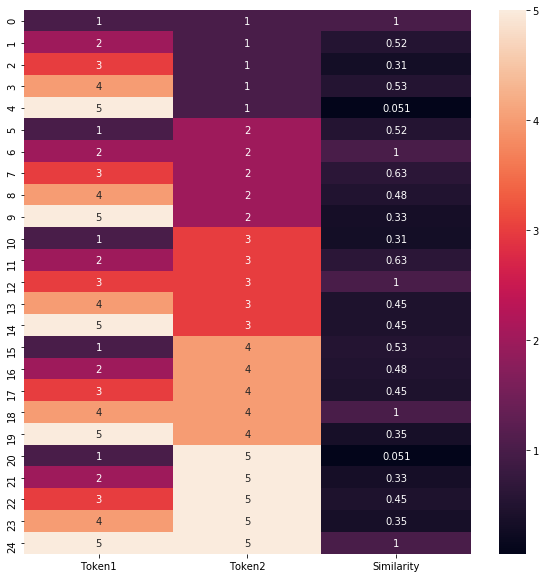

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
sns.heatmap(df2, annot=True)

## Sentence Boundary Detection(Sentence Segmentation)

In [31]:
# using Default Function

ex_text = "this is a sentence...hello...and another sentence."
doc_sbd = nlp(ex_text)

for sent in doc_sbd.sents:
    print(sent.text)

this is a sentence...
hello...and another sentence.


In [32]:
# using Custom Function

def custom_sbd(doc):
    for token in doc[:-1]:
        if token.text == '...':
            doc[token.i+1].is_sent_start = True
    return doc

# Adding the rule before parsing
nlp.add_pipe(custom_sbd, before='parser')
doc_sbd = nlp(ex_text)

for sent in doc_sbd.sents:
    print(sent.text)    

this is a sentence...
hello...
and another sentence.


In [ ]:
#print('After:', [sent.text for sent in doc.sents])

### References

https://spacy.io/usage/linguistic-features

https://gist.github.com/aparrish/f21f6abbf2367e8eb23438558207e1c3

https://www.youtube.com/playlist?list=PLJ39kWiJXSiz1LK8d_fyxb7FTn4mBYOsD


This notebook will be updated with more information